### Introduction and Objectives

**Problem Statement:**

In industrial settings, predictive maintenance is crucial for minimizing equipment downtime and reducing maintenance costs. One key aspect of predictive maintenance is the ability to forecast when machinery is likely to fail based on historical operational data. The dataset provided includes various features related to the operational conditions of machinery, such as air and process temperatures, rotational speed, torque, and tool wear. Additionally, it contains information about machine failures and the types of failures that have occurred.

**Objective:**

The objective of this analysis is to develop predictive models to anticipate machinery failures before they occur. By leveraging the dataset, we aim to:

1. **Understand the Data**: Explore the dataset to understand the distributions and relationships among different features.
2. **Preprocess the Data**: Clean and preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and normalizing features if necessary.
3. **Develop Predictive Models**: Build and evaluate machine learning models to predict the likelihood of machine failure based on the operational conditions.
4. **Identify Key Features**: Determine which features have the most significant impact on the prediction of failures.
5. **Provide Insights**: Generate actionable insights that can help in optimizing maintenance schedules and reducing unexpected downtimes.

By achieving these objectives, we aim to enhance the maintenance strategies and operational efficiency of the machinery, ultimately leading to cost savings and improved reliability.

In [17]:
import pandas as pd

In [3]:
df = pd.read_csv('ai4i2020.csv')

In [4]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## Variable Explanation

This synthetic dataset is modeled after an existing milling machine and consists of 10,000 data points stored as rows with 14 features in columns.

### 1. UDI
- **Description:** Unique identifier ranging from 1 to 10,000.

### 2. Product ID
- **Description:** Consists of a letter (L, M, or H) representing product quality variants and a variant-specific serial number.
  - **L**: Low quality (50% of all products)
  - **M**: Medium quality (30%)
  - **H**: High quality (20%)

### 3. Type
- **Description:** Product type as specified in (L, M, or H).

### 4. Air Temperature [K]
- **Description:** Generated using a random walk process, later normalized to a standard deviation of 2 K around 300 K.

### 5. Process Temperature [K]
- **Description:** Generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

### 6. Rotational Speed [rpm]
- **Description:** Calculated from a power of 2860 W, overlaid with normally distributed noise.

### 7. Torque [Nm]
- **Description:** Torque values are normally distributed around 40 Nm with a standard deviation of 10 Nm and no negative values.

### 8. Tool Wear [min]
- **Description:** The quality variants (H/M/L) add 5/3/2 minutes of tool wear to the used tool in the process.

### 9. Machine Failure
- **Description:** A label indicating whether the machine has failed at this particular data point. The machine failure consists of five independent failure modes:
  - **Tool Wear Failure (TWF):** The tool will be replaced or fail at a randomly selected tool wear time between 200 - 240 mins. In this dataset, the tool is replaced 69 times and fails 51 times (randomly assigned).
  - **Heat Dissipation Failure (HDF):** Heat dissipation causes a process failure if the difference between air and process temperatures is below 8.6 K and the tool's rotational speed is below 1380 rpm. This occurs in 115 data points.
  - **Power Failure (PWF):** The product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails. This occurs 95 times in the dataset.
  - **Overstrain Failure (OSF):** If the product of tool wear and torque exceeds 11,000 minNm for the L variant, 13,000 minNm for the M variant, and 15,000 minNm for the H variant, the process fails. This occurs 90 times in the dataset.
  - **Random Failure (RNF):** Randomly assigned failure occurrences based on historical failure data.


## Understanding the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Data Preprocessing

In [7]:
df_clean = df.dropna()

#### Encoding Categorical Variables

In [8]:
# Encode categorical variables (e.g., 'Type')
df_clean = pd.get_dummies(df_clean, columns=['Type'], drop_first=True)


#### Normalizing/Standardizing Features

In [9]:
from sklearn.preprocessing import StandardScaler

# Select features to normalize
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the selected features
df_clean[features] = scaler.fit_transform(df_clean[features])

## Exploratory Data Analysis (EDA)

#### Distribution of Variables

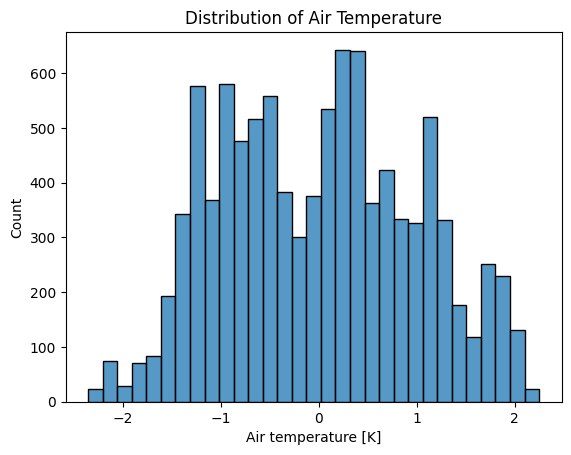

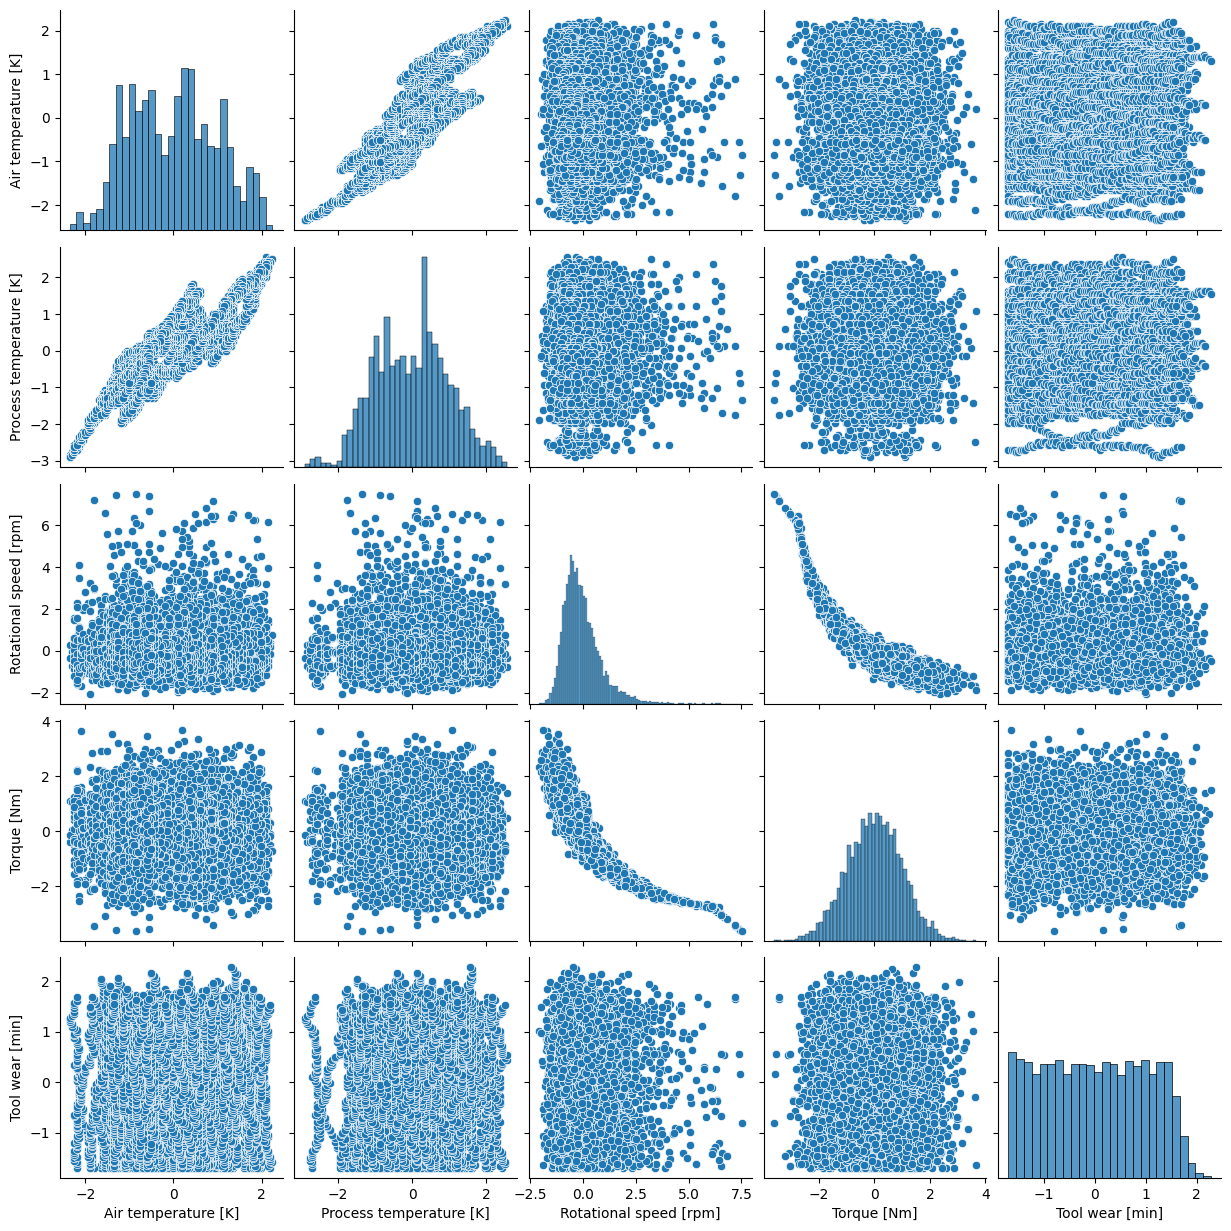

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of air temperature
sns.histplot(df_clean['Air temperature [K]'])
plt.title('Distribution of Air Temperature')
plt.show()

# Plot pairplot to visualize relationships between features
sns.pairplot(df_clean[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
plt.show()


#### Correlation Analysis

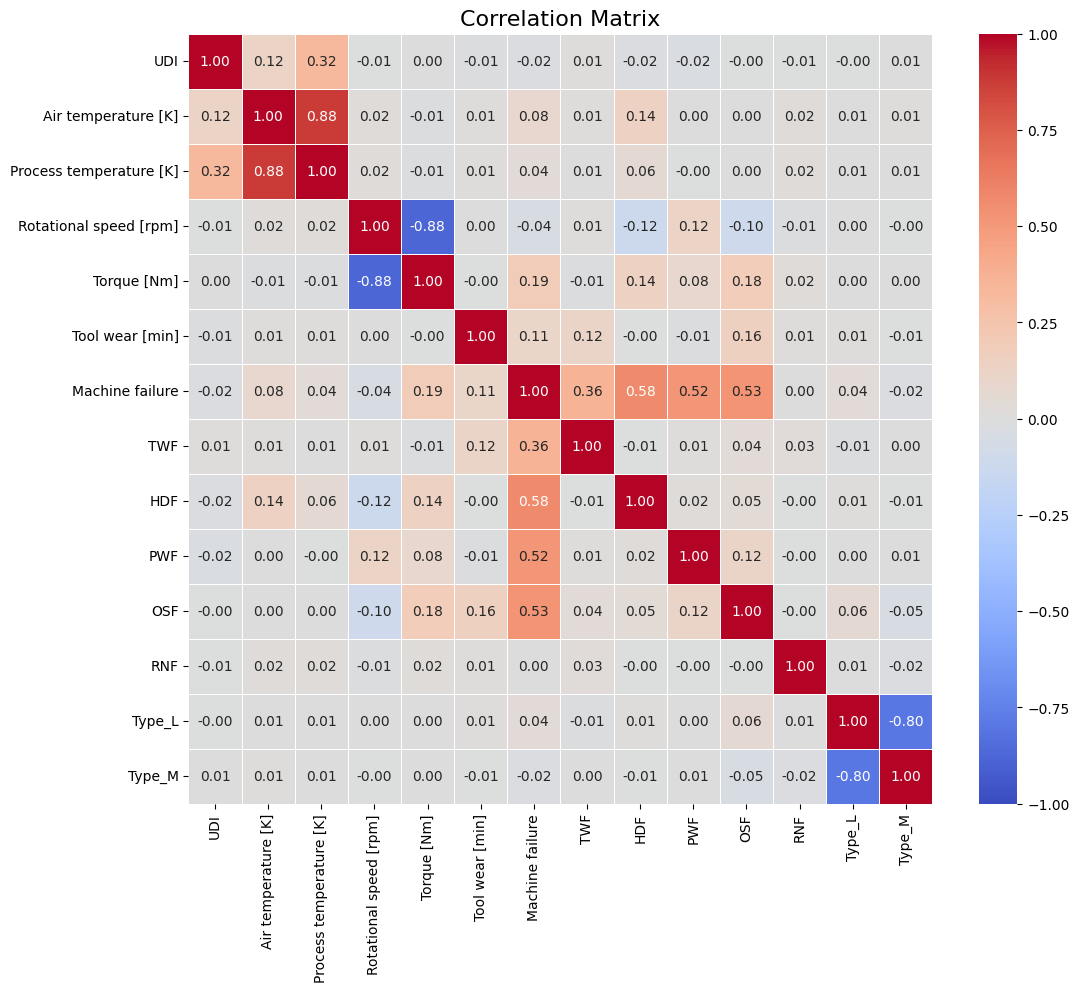

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df_clean.corr()

# Set the size of the figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 10})

# Set the title and show the plot
plt.title('Correlation Matrix', size=16)
plt.show()



## Develop Predictive Models

#### Splitting the Data

In [12]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_clean.drop(['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = df_clean['Machine failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Training and Evaluating Models

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1935    4]
 [  26   35]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.90      0.57      0.70        61

    accuracy                           0.98      2000
   macro avg       0.94      0.79      0.85      2000
weighted avg       0.98      0.98      0.98      2000



#### Feature Importance

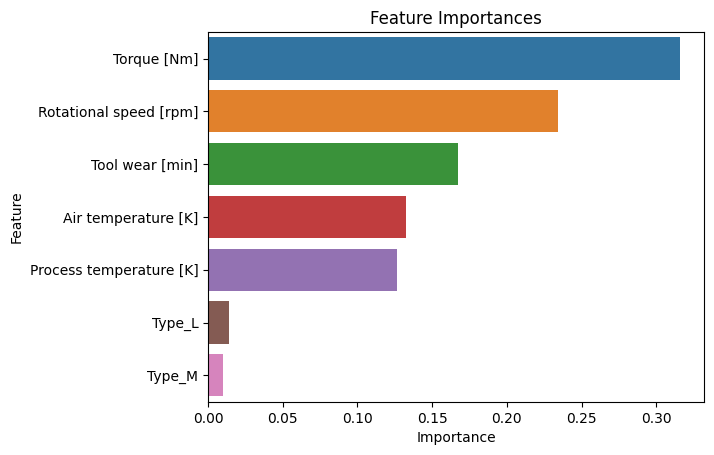

In [14]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


In [16]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
3,Torque [Nm],0.316095
2,Rotational speed [rpm],0.234085
4,Tool wear [min],0.167106
0,Air temperature [K],0.132485
1,Process temperature [K],0.126279
5,Type_L,0.013774
6,Type_M,0.010176


### **Conclusion and Recommendations**

**Overview:**

The predictive maintenance model has shown promising results in identifying machinery failures based on the provided operational data. The model achieved an overall accuracy of 98%, demonstrating strong performance. However, there is a notable disparity in performance between predicting non-failure (class 0) and predicting failure (class 1), with a precision of 90% and recall of 57% for the failure class. This indicates that while the model is effective at identifying non-failures, it has room for improvement in detecting actual failures.

**Performance Analysis:**

1. **Accuracy and Metrics:**
   - The model's accuracy stands at 98%, which is quite high and indicates that it correctly classifies the majority of cases. However, the recall for the failure class is 57%, suggesting that a significant number of actual failures are not being detected. This can lead to missed maintenance opportunities and potential unplanned downtimes.
   - The F1-score for the failure class is 0.70, which reflects a balance between precision and recall but also highlights the need for improvement in detecting true failures.

2. **Feature Importance:**
   - **Torque [Nm]** (Importance: 0.316): This feature is the most influential in predicting machinery failures. It is crucial to monitor and manage torque levels closely.
   - **Rotational Speed [rpm]** (Importance: 0.234): This feature also plays a significant role in failure prediction. Ensuring optimal rotational speeds can help in reducing the risk of failure.
   - **Tool Wear [min]** (Importance: 0.167): The wear and tear of tools are important indicators of potential failures. Regular checks and replacements can mitigate risks.
   - **Air Temperature [K]** (Importance: 0.132) and **Process Temperature [K]** (Importance: 0.126): Both temperatures have a moderate impact on failure prediction. Maintaining these temperatures within optimal ranges can prevent overheating and related issues.
   - **Type of Product** (Type_L and Type_M): These features have relatively low importance compared to the other features, suggesting that the type of product is less critical in predicting failures.

**Recommendations:**

1. **Enhanced Monitoring of Critical Variables:**
   - **Torque and Rotational Speed:** Implement more stringent monitoring and control mechanisms for torque and rotational speed. Consider integrating real-time monitoring systems that can trigger alerts when these variables deviate from the optimal ranges.
   - **Tool Wear:** Establish a routine maintenance schedule that includes regular inspections and replacements of tools based on their wear levels. Use predictive alerts to replace tools before they reach critical wear levels.

2. **Temperature Management:**
   - Implement cooling and temperature control systems to maintain air and process temperatures within safe operating ranges. Regularly calibrate temperature sensors to ensure accurate readings.

3. **Improve Failure Detection:**
   - **Model Improvement:** Enhance the predictive model by incorporating additional features or refining existing ones. Consider using advanced techniques such as ensemble methods or deep learning to improve recall for the failure class.
   - **Data Collection:** Increase the amount of failure data collected to provide the model with more examples of failure scenarios. This will help the model learn better and improve its ability to detect failures.

4. **Maintenance Strategy Optimization:**
   - **Predictive Maintenance:** Utilize the model's predictions to optimize maintenance schedules. Prioritize maintenance activities based on the predicted likelihood of failure and the importance of the machinery.
   - **Training and Awareness:** Educate maintenance personnel on the key indicators of potential failures and the importance of monitoring the critical variables highlighted by the model.

5. **Continuous Improvement:**
   - Regularly review and update the predictive maintenance model to incorporate new data and insights. Continuously monitor the performance of the model and make adjustments as necessary to maintain high accuracy and recall.

**Conclusion:**

The predictive maintenance model offers a solid foundation for improving machinery reliability and reducing unplanned downtimes. By focusing on the most influential features and enhancing failure detection capabilities, organizations can significantly improve their maintenance strategies. Implementing the recommended actions will lead to more effective maintenance practices, reducing costs, and increasing operational efficiency.